### Exercise 4.3

For the temperature data of the previous example, consider a polynomial fit of the form 
$$f(x) = \sum_{k=0}^{10} \alpha_k x^k, $$

where the loadings $\alpha_k$ are to be determined by four regression techniques: 1) least-squares, 2) LASSO, 3) ridge, and 4) elastic net.

- Compare the models for each against each other.

- Randomly pick any time point and corrupt the temperature measurement at that location. For instance, the temperature reading at that location could be zero. Investigate the resulting model and $E_2$ error for the four regression techniques considered.

- Identify the models that are robust to such an outlier and those that are not. 

- Explicitly calculate the variance of the loading coefficients $\alpha_k$ for each method for a number of random trials with one or more corrupt data points. 



In [1]:
import numpy as np

In [2]:
n = 24
p = 10+1

x = np.arange(1,n+1, dtype=np.int64)

y = np.array([75.0, 77.0, 76.0, 73.0, 69.0, 68.0, 
              63.0, 59.0, 57.0, 55.0, 54.0, 52.0, 
              50.0, 50.0, 49.0, 49.0, 49.0, 50.0, 
              54.0, 56.0, 59.0, 63.0, 67.0, 72.0 ])

In [3]:
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[75. 77. 76. 73. 69. 68. 63. 59. 57. 55. 54. 52. 50. 50. 49. 49. 49. 50.
 54. 56. 59. 63. 67. 72.]


In [4]:
import matplotlib.pyplot as plt

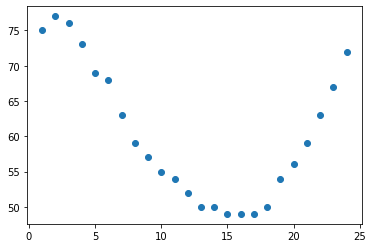

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
X = np.empty(shape=(n, p), dtype=np.float64)

In [7]:
for i in range(p):
    X[:,i] = np.power(x,i) 

In [8]:
X_standardize = X

X_standardize[:,1:p] = (X_standardize[:,1:p] - np.mean(X_standardize[:,1:p], axis=0))/np.std(X_standardize[:,1:p], axis=0)

- Four regression techniques: 1) least-squares, 2) LASSO, 3) ridge, and 4) elastic net.

In [9]:
from sklearn import linear_model

In [10]:
## 1) Least-square fit
coef_ls = np.linalg.pinv( X_standardize ) @ y 
yhat_ls = X_standardize @ coef_ls

In [11]:
coef_ls

array([ 6.02500000e+01,  2.07400891e+02, -3.38277585e+03,  2.63563746e+04,
       -1.25071698e+05,  3.75672713e+05, -7.24335992e+05,  8.91976969e+05,
       -6.77287837e+05,  2.88701681e+05, -5.28387298e+04])

In [ ]:
# help(linear_model.Lasso)

In [12]:
## 2) LASSO
lasso_reg = linear_model.Lasso(alpha=1, random_state=0, max_iter=10**8, tol=10**(-6))
lasso_reg.fit(X_standardize[:,1:p], y)

coef_lasso = lasso_reg.coef_
inte_lasso = lasso_reg.intercept_


In [13]:
print(coef_lasso)
print(np.insert(coef_lasso, 0, inte_lasso))

[-8.95560611 -0.          0.          0.          0.          0.
  1.36643283  6.21596681  0.          0.        ]
[60.25       -8.95560611 -0.          0.          0.          0.
  0.          1.36643283  6.21596681  0.          0.        ]


In [14]:
coef_lasso = np.insert(coef_lasso, 0, inte_lasso)
yhat_lasso = X_standardize @ coef_lasso

In [15]:
# help(linear_model.Ridge)

In [16]:
## 3) Ridge
ridge_reg = linear_model.Ridge(alpha=1, random_state=0, max_iter=10**8, tol=10**(-6))
ridge_reg.fit(X_standardize[:,1:p], y)

coef_ridge = ridge_reg.coef_
inte_ridge = ridge_reg.intercept_

In [17]:
print(coef_ridge)
print(np.insert(coef_ridge, 0, inte_ridge))

[-12.09259251  -3.52172339   1.19072798   3.13936289   3.53438457
   3.11790544   2.30236153   1.31296331   0.27235502  -0.75333524]
[ 60.25       -12.09259251  -3.52172339   1.19072798   3.13936289
   3.53438457   3.11790544   2.30236153   1.31296331   0.27235502
  -0.75333524]


In [18]:
coef_ridge = np.insert(coef_ridge, 0, inte_ridge)
yhat_ridge = X_standardize @ coef_ridge

In [ ]:
# help(linear_model.ElasticNet)

In [19]:
## 4) Elastic net
elasNet_reg = linear_model.ElasticNet(alpha=1, random_state=0, max_iter=10**8, tol=10**(-6))
elasNet_reg.fit(X_standardize[:,1:p], y)

coef_elasNet = elasNet_reg.coef_
inte_elasNet = elasNet_reg.intercept_

In [ ]:
print(coef_elasNet)
print(np.insert(coef_elasNet, 0, inte_elasNet))

In [20]:
coef_elasNet = np.insert(coef_elasNet, 0, inte_elasNet)
yhat_elasNet = X_standardize @ coef_elasNet


- Compare the models for each against each other

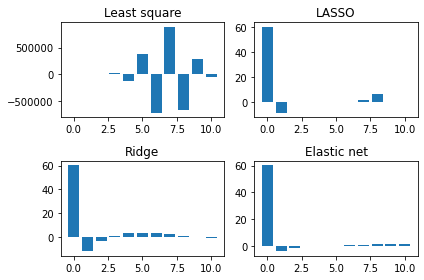

In [21]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].bar(range(11), coef_ls)
axs[0].set_title("Least square")

axs[1].bar(range(11), coef_lasso)
axs[1].set_title("LASSO")

axs[2].bar(range(11), coef_ridge)
axs[2].set_title("Ridge")

axs[3].bar(range(11), coef_elasNet)
axs[3].set_title("Elastic net")

fig.tight_layout()

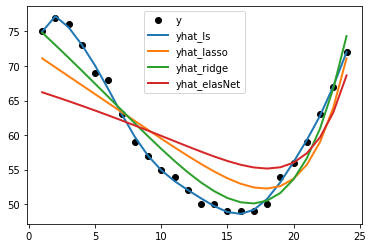

In [22]:
plt.figure()
plt.plot(x, y, "o", color="k", label="y")
plt.plot(x, yhat_ls,     linewidth=2, label='yhat_ls')
plt.plot(x, yhat_lasso,  linewidth=2, label='yhat_lasso')
plt.plot(x, yhat_ridge,  linewidth=2, label='yhat_ridge')
plt.plot(x, yhat_elasNet,linewidth=2, label='yhat_elasNet')
plt.legend()
plt.show()

- Randomly pick any time point and corrupt the temperature measurement at that location

In [23]:
np.random.seed(6397)

In [24]:
id = np.random.choice(x-1)
print(id)

0


In [25]:
y[id] = 0
print(y)

[ 0. 77. 76. 73. 69. 68. 63. 59. 57. 55. 54. 52. 50. 50. 49. 49. 49. 50.
 54. 56. 59. 63. 67. 72.]


In [26]:
## 1) Least-square fit
coef_ls = np.linalg.pinv( X_standardize ) @ y 
yhat_ls = X_standardize @ coef_ls


## 2) LASSO
lasso_reg = linear_model.Lasso(alpha=1, random_state=0, max_iter=10**8, tol=10**(-6))
lasso_reg.fit(X_standardize[:,1:p], y)

coef_lasso = lasso_reg.coef_
inte_lasso = lasso_reg.intercept_

coef_lasso = np.insert(coef_lasso, 0, inte_lasso)
yhat_lasso = X_standardize @ coef_lasso


## 3) Ridge
ridge_reg = linear_model.Ridge(alpha=1, random_state=0, max_iter=10**8, tol=10**(-6))
ridge_reg.fit(X_standardize[:,1:p], y)

coef_ridge = ridge_reg.coef_
inte_ridge = ridge_reg.intercept_

coef_ridge = np.insert(coef_ridge, 0, inte_ridge)
yhat_ridge = X_standardize @ coef_ridge


## 4) Elastic net
elasNet_reg = linear_model.ElasticNet(alpha=1, random_state=0, max_iter=10**8, tol=10**(-6))
elasNet_reg.fit(X_standardize[:,1:p], y)

coef_elasNet = elasNet_reg.coef_
inte_elasNet = elasNet_reg.intercept_

coef_elasNet = np.insert(coef_elasNet, 0, inte_elasNet)
yhat_elasNet = X_standardize @ coef_elasNet

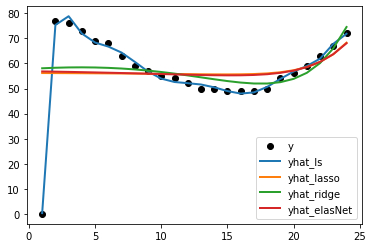

In [27]:
plt.figure()
plt.plot(x, y, "o", color="k", label="y")
plt.plot(x, yhat_ls,     linewidth=2, label='yhat_ls')
plt.plot(x, yhat_lasso,  linewidth=2, label='yhat_lasso')
plt.plot(x, yhat_ridge,  linewidth=2, label='yhat_ridge')
plt.plot(x, yhat_elasNet,linewidth=2, label='yhat_elasNet')
plt.legend()
plt.show()

- Explicitly calculate the variance of the loading coefficients $\alpha_k$ for each method for a number of random trials with one or more corrupt data points. 

In [32]:
E_ls = np.linalg.norm(np.subtract(y, yhat_ls))
E_lasso = np.linalg.norm(np.subtract(y, yhat_lasso))
E_ridge = np.linalg.norm(np.subtract(y, yhat_ridge))
E_elasNet = np.linalg.norm(np.subtract(y, yhat_elasNet))

In [33]:
print(E_ls)
print(E_lasso)
print(E_ridge)
print(E_elasNet)

5.3557983372700715
70.22970567680053
67.81447259413048
70.00201929754554
